# Overview
- Goal: Predict future stock prices based on historical data using a simple regression model
- Concepts Covered: Time series forecasting, feature extraction, regression.

# Tools/Packages
Make sure you have the following Python packages installed:
```pip install pandas numpy matplotlib scikit-learn yfinance```

## Step 1: Import Libraries
Start by importing the necessary libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import yfinance as yf

## Step 2: Fetch Stock Data
Use the ```yfinance``` library to fetch historical stock data. For example, let's use Nvidia (NVDA):

In [44]:
# Fetch stock data
stock_data = yf.download("NVDA", start="2020-01-01", end="2024-12-31")
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2020-01-02  5.972710  5.972710  5.893293  5.943831  237536000
2020-01-03  5.877112  5.920928  5.828067  5.852963  205384000
2020-01-06  5.901759  5.906987  5.757614  5.783754  262636000
2020-01-07  5.973208  6.019016  5.885077  5.930138  314856000
2020-01-08  5.984412  6.025739  5.928895  5.968977  277108000


## Step 3: Data Preparation
Prepare the data for prediction analysis:

In [45]:
# Use the 'Close' price for predictions
stock_data['Date'] = stock_data.index
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Day'] = (stock_data['Date'] - stock_data['Date'].min()).dt.days

# Features and target
X = stock_data[['Day']].values # Independent variable: Days
y = stock_data['Close'].values # Dependent variable: Close prices

# Split into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Train the Model
Fit a simple linear regression model:

In [46]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
print(f"Model R^2 Score {model.score(X_test, y_test):.2f}")

Model R^2 Score 0.68


## Step 5: Make Predictions
Predict stock prices using the model:

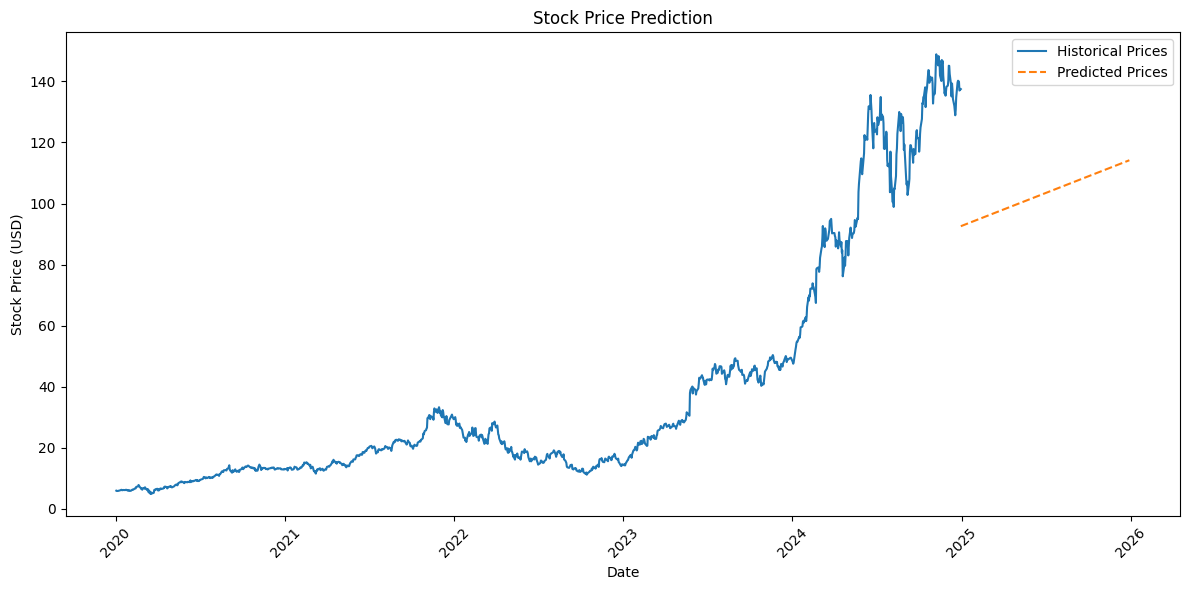

In [47]:
# Make Predictions
future_days = np.array(range(X[-1][0] + 1, X[-1][0] + 366)).reshape(-1, 1)  # Ensure 365 predictions
predicted_prices = model.predict(future_days)

# Convert future_days to actual dates
future_dates = pd.date_range(start=stock_data['Date'].iloc[-1], periods=365)

# Plot predictions with dates on the x-axis
plt.figure(figsize=(12, 6))

# Plot historical prices
plt.plot(stock_data['Date'], stock_data['Close'], label="Historical Prices")

# Plot predicted prices
plt.plot(future_dates, predicted_prices, label="Predicted Prices", linestyle="--")

# Add labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Stock Price Prediction")
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()